# 1 - Introdução ao problema e força bruta

## 1.2 - O Problema das Entregas: Origem, Endereços e Destino

Imagine uma empresa inovadora, enfrentando o desafio cotidiano de realizar entregas eficientes em uma cidade cheia de dinamismo. A companhia busca incessantemente formas de otimizar suas rotas de entrega para oferecer um serviço rápido e de qualidade, enquanto mantém os custos operacionais sob controle.

**Definindo a Origem: O Ponto de Partida**

Tudo começa na **origem**, o centro de distribuição. É deste ponto que os veículos de entrega saem carregados, prontos para distribuir os produtos aos clientes. A origem é representada de maneira simples e objetiva: uma tupla contendo dois elementos, a latitude e a longitude:

```python
origem = (x_origem, y_origem)
```

Esta coordenada geográfica funciona como o ponto inicial de todas as rotas de entrega planejadas para o dia.

**Estabelecendo o Destino: O Ponto de Chegada**

Cada rota precisa ter um ponto final, o **destino**. Este pode ser o próprio centro de distribuição, marcando o retorno dos veículos, ou pode ser um outro local estratégico, como um segundo centro de distribuição ou uma oficina para manutenção dos veículos. Da mesma forma que a origem, o destino é definido por uma tupla de latitude e longitude:

```python
destino = (x_destino, y_destino)
```

**Listando os Endereços: Os Pontos Intermediários**

Entre a origem e o destino, temos os **endereços de entrega**, os pontos que os veículos devem visitar para realizar as entregas. Cada endereço é um ponto no espaço, representado igualmente por uma tupla de coordenadas geográficas, formando uma lista:

```python
enderecos = [(x1, y1), (x2, y2), ..., (xn, yn)]
```

Estes são os pontos de parada obrigatória na rota, e o desafio é conectá-los da maneira mais eficiente possível.

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2, 1), (2,2), (8, 3), (5, 3)]

**Definindo uma Rota Básica: Conexão Direta entre Pontos**

Antes de embarcarmos na otimização das rotas, é essencial entender como uma rota básica pode ser representada e estruturada. Uma maneira simples e intuitiva de iniciar é conectando diretamente a **origem** aos **endereços de entrega** e, finalmente, ao **destino**. Este processo gerará uma lista ordenada de pontos que delineiam um caminho a ser seguido.

**Estrutura de uma Rota**

Uma rota, neste contexto, é uma lista de tuplas, onde cada tupla representa as coordenadas cartesianas \( (x, y) \) de um ponto específico na rota. Esta lista é ordenada: começa com a origem, passa por todos os endereços de entrega, e culmina no destino. Uma representação simplificada da rota seria:

```python
rota = [origem, (x1, y1), (x2, y2), ..., (xn, yn), destino]
```

**Construindo Uma Rota Inicial**

Agora que compreendemos a estrutura básica de uma rota, podemos começar a construir a nossa rota inicial. Este processo é bastante direto, principalmente porque Python facilita a concatenação de listas.

**Criação Simplificada de uma Rota**

A rota inicial pode ser criada através da concatenação de três listas:

1. Uma lista contendo apenas a origem.
2. A lista de endereços de entrega.
3. Uma lista contendo apenas o destino.

Com este método, podemos facilmente construir a rota completa, do ponto de origem até o ponto de destino, passando por todos os endereços onde as entregas devem ser realizadas.

O código abaixo ilustra este processo de forma simplificada:

```python
rota = [origem] + enderecos + [destino]
```

In [ ]:
rota = [origem] + enderecos + [destino]

In [ ]:
rota

[(0, 0), (2, 1), (2, 2), (8, 3), (5, 3), (4, 4)]

Para visualizar efetivamente as rotas geradas e facilitar o processo de análise e otimização, utilizaremos a biblioteca `matplotlib.pyplot`. Este pacote gráfico em Python é extremamente eficaz para produzir gráficos estáticos, interativos e animados de alta qualidade em uma sintaxe simples e fácil de entender.

No Google Colab, a biblioteca `matplotlib` já vem pré-instalada, então você pode pular o passo de instalação e ir diretamente para a importação da biblioteca.

```python
import matplotlib.pyplot as plt
```

Agora, considerando que você já temos uma `rota` definida (uma lista de tuplas, onde cada tupla representa as coordenadas cartesianas de um ponto na rota), o plot da rota pode ser feito da seguinte forma:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.spatial.distance import euclidean as distancia_euclidiana

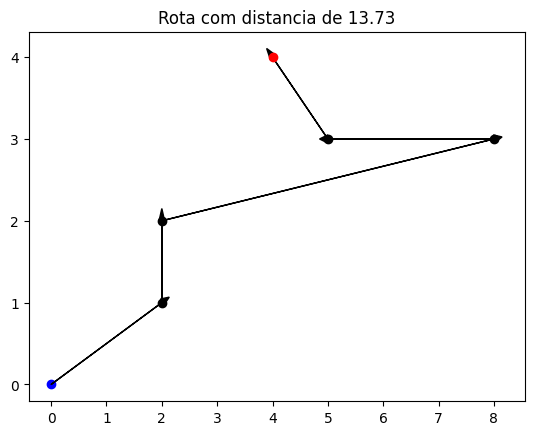

In [ ]:
# Definindo o tamanho da rota para facilitar a iteração posterior
tamanho_rota = len(rota)
# Inicializando a variável que armazenará a distância total percorrida na rota
distancia_percorrida = 0

# Iterando sobre cada ponto na rota
for i in range(tamanho_rota):
  # Coordenadas do ponto atual na iteração
  x, y = rota[i]
  # Definindo a cor padrão dos pontos como preta
  cor = "black"
  # Se o ponto atual é o ponto de origem, sua cor será azul
  if i == 0:
    cor = "blue"
  # Se o ponto atual é o ponto de destino, sua cor será vermelha
  elif i == tamanho_rota - 1:
    cor = "red"

  # Plotando o ponto atual com a cor definida
  plt.scatter(x, y, color=cor)

  # Se o ponto atual não é o último, desenhamos uma seta até o próximo ponto
  if i < tamanho_rota - 1:
    # Coordenadas do próximo ponto na rota
    x1, y1 = rota[i+1]
    # Calculando a diferença nas coordenadas para determinar o tamanho e direção da seta
    dx = x1 - x
    dy = y1 - y
    # Desenhando uma seta do ponto atual para o próximo ponto
    plt.arrow(x, y, dx, dy, color="black", head_width=0.1)
    # Atualizando a distância total percorrida com a distância até o próximo ponto
    distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

# Adicionando um título ao gráfico, incluindo a distância total percorrida na rota
plt.title(f"Rota com distancia de {round(distancia_percorrida, 2)}")
# Mostrando o gráfico
plt.show()


**Interpretação do Gráfico:**

1. **Pontos no Gráfico:**
   - Cada ponto (ou nó) no gráfico representa uma localização no espaço 2D, que pode ser um endereço de entrega, a origem (depósito inicial), ou o destino final (outro centro de distribuição ou oficina, por exemplo).
   - A origem é representada pelo ponto azul, e o destino pelo ponto vermelho. Os endereços de entrega intermediários são representados por pontos pretos.

2. **Setas Entre os Pontos:**
   - As setas conectam os pontos consecutivamente, indicando a sequência de entregas.
   - A direção das setas mostra o caminho que o veículo de entrega deve seguir, partindo da origem, passando pelos pontos de entrega, e finalmente chegando ao destino.

3. **Distância Percorrida:**
   - O título do gráfico apresenta a distância total percorrida nesta rota específica.
   - A distância entre cada par de pontos consecutivos é calculada usando a função `distancia_euclidiana`. Essa função calcula a distância euclidiana padrão entre dois pontos no plano cartesiano.
   - A `distancia_percorrida` é acumulada durante o loop, somando a distância entre cada par de pontos consecutivos na rota.

**Como Ler o Gráfico:**

- **Início e Fim da Rota:**
  - Olhe para os pontos azul e vermelho para identificar onde a rota começa e termina, respectivamente.

- **Sequência de Entregas:**
  - Siga as setas a partir do ponto azul para visualizar a ordem e o caminho das entregas até chegar ao ponto vermelho.

- **Distância Total:**
  - Verifique o título do gráfico para saber a distância total percorrida nessa rota.

 **Análise Adicional:**
- Este gráfico é especialmente útil para visualizar e comparar diferentes rotas propostas pelo seu algoritmo de otimização.
- A análise visual pode nos ajudar a identificar rapidamente rotas ineficientes ou pontos de entrega que estão significativamente fora do caminho ideal.

Por fim, podemos transformar esse código em uma função para reutilizarmos posteriormente.

In [ ]:
def desenhar_rota(rota):
  tamanho_rota = len(rota)
  distancia_percorrida = 0

  for i in range(tamanho_rota):
    x,y = rota[i]

    cor = "black"
    if i == 0:
      cor = "blue"
    elif i == tamanho_rota - 1:
      cor = "red"

    plt.scatter(x, y, color=cor)

    if i < tamanho_rota - 1:
      x1, y1 = rota[i+1]
      dx = x1 - x
      dy = y1 - y
      plt.arrow(x, y, dx, dy, color="black", head_width = 0.1)
      distancia_percorrida = distancia_percorrida + distancia_euclidiana(rota[i], rota[i+1])

  plt.title(f'Rota com distancia de {round(distancia_percorrida, 2)}')
  plt.show()

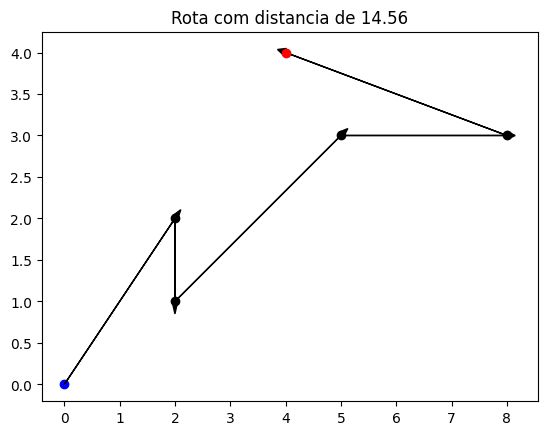

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3)]

rota = [origem] + enderecos + [destino]
desenhar_rota(rota)

## 1.3 - Resolução via Força Bruta


O método de **Força Bruta** é uma abordagem direta e exaustiva para resolver o problema de otimização da rota de entrega. Este método não faz suposições, não elimina alternativas e, de fato, examina todas as possíveis combinações de rotas para encontrar a mais eficiente.


In [ ]:
from itertools import permutations

In [ ]:
def calcular_distancia_rota(rota):
    """
    Esta função calcula a distância total de uma rota, somando as distâncias
    euclidianas entre pontos consecutivos da rota fornecida.

    Parameters:
    rota (list): Uma lista de pontos (tuplas) onde cada ponto representa uma posição no espaço.

    Returns:
    float: A distância total percorrida na rota.
    """

    distancia = 0  # Inicializa a variável que armazenará a distância total.
    tamanho_rota = len(rota)  # Armazena o número total de pontos na rota.

    # Itera sobre cada ponto na rota.
    for i in range(tamanho_rota):
        # Verifica se o ponto atual não é o último na rota.
        if i < tamanho_rota - 1:
            # Calcula e acumula a distância euclidiana entre o ponto atual e o próximo.
            distancia = distancia + distancia_euclidiana(rota[i], rota[i+1])

    return distancia  # Retorna a distância total calculada.



**Funcionamento do Método:**
O método de Força Bruta cria todas as permutações possíveis dos endereços de entrega (excluindo origem e destino), criando assim todas as rotas possíveis. Para cada rota gerada, podemos calcular a distância total usando uma função `calcular_distancia_rota` e mantém um registro da rota que tem a menor distância total. A função `calcular_distancia_rota` é uma função que retorna a soma das distâncias entre todos os pontos consecutivos na rota.

**Implementação com Permutations:**
Na implementação usando o `permutations` do módulo `itertools`, cada permutação dos endereços é considerada uma rota possível. Para cada permutação, a origem é adicionada no início, e o destino é adicionado no final da lista de endereços permutados. Então, a distância total da rota é calculada, e a rota é comparada com a rota conhecida de menor distância. Se a rota recém-calculada tem uma distância menor, ela se torna a nova rota de menor distância.

[(0, 0), (2, 1), (2, 2), (5, 3), (8, 3), (4, 4)] 13.52145126328583


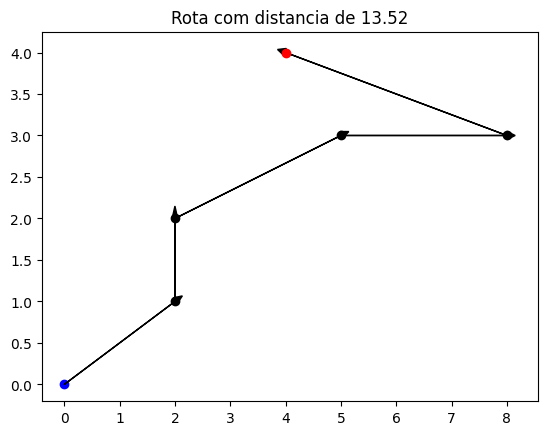

In [ ]:
# Definindo as variáveis para armazenar a menor distância e a rota correspondente
menor_distancia = float('inf')  # Inicializando a menor distância com infinito
menor_rota = None  # Inicializando a variável que armazenará a rota correspondente à menor distância

# Iterando sobre todas as permutações possíveis dos endereços
for permutacao in permutations(enderecos):
    # Construindo a rota atual adicionando o ponto de origem no início,
    # o ponto de destino no final, e a permutação atual dos endereços no meio
    rota = [origem] + list(permutacao) + [destino]

    # Calculando a distância total da rota atual usando a função definida anteriormente
    distancia_rota = calcular_distancia_rota(rota)

    # Verificando se a distância total da rota atual é menor que a menor distância registrada até agora
    if distancia_rota < menor_distancia:
        # Atualizando a menor distância e a rota correspondente
        menor_distancia = distancia_rota
        menor_rota = rota

# Imprimindo a menor rota e sua distância correspondente
print(menor_rota, menor_distancia)

# Desenhando a rota no espaço, usando uma função 'desenhar_rota()' que deve estar definida em algum lugar no seu código
desenhar_rota(menor_rota)


##  1.4 - Análise de Eficiência da Força Bruta


Podemos definir uma função para reutilizar posteriormente caso necessário.

In [ ]:
def forca_bruta(origem, destino, enderecos):
    # Inicializa a variável que vai armazenar a menor distância encontrada
    # com infinito, pois qualquer distância calculada será menor que infinito.
    menor_distancia = float('inf')

    # Inicializa a variável que vai armazenar a rota correspondente à menor distância
    # com None, pois ainda não encontramos nenhuma rota.
    menor_rota = None

    # Itera sobre todas as permutações possíveis dos endereços.
    # permutations(enderecos) retorna todas as possíveis ordenações dos endereços,
    # ou seja, todas as rotas possíveis (sem considerar origem e destino).
    for permutacao in permutations(enderecos):
        # Cria uma rota completa adicionando a origem no início da permutação
        # dos endereços e o destino no final.
        rota = [origem] + list(permutacao) + [destino]

        # Calcula a distância total da rota usando a função calcular_distancia_rota
        distancia_rota = calcular_distancia_rota(rota)

        # Verifica se a distância da rota calculada é menor que a menor distância encontrada até agora.
        # Se for, atualiza as variáveis menor_distancia e menor_rota.
        if distancia_rota < menor_distancia:
            menor_distancia = distancia_rota
            menor_rota = rota

    # Retorna a menor rota encontrada e sua respectiva distância.
    return menor_rota, menor_distancia


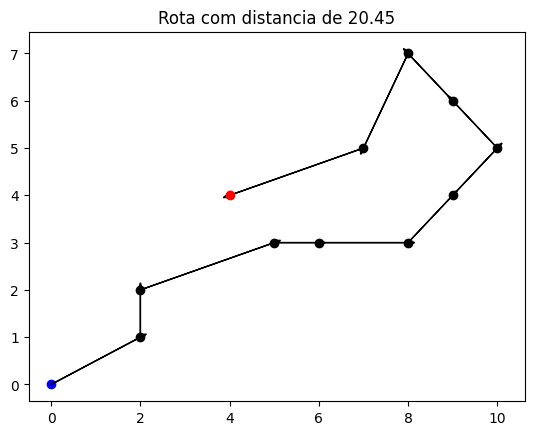

In [ ]:
origem = (0,0)
destino = (4,4)

enderecos = [(2,2), (2, 1), (5, 3), (8, 3), (10, 5), (9, 4), (8, 7), (6, 3), (9, 6), (7, 5)]

menor_rota, menor_distancia = forca_bruta(origem, destino, enderecos)
desenhar_rota(menor_rota)